# ***Línea 144 - Grupo 2***
---
La Línea 144 brinda atención telefónica especializada a mujeres víctimas de violencia de género durante las 24 horas, los 365 días del año.
Ofrece información, contención y asesoramiento en aquellas temáticas relacionadas con la violencia física, psicológica, sexual, económica y patrimonial, y simbólica. Su objetivo es acompañar en las distintas situaciones, ya sea antes, durante o después de un episodio de violencia.
El dataset recopila la información recuperada de la página https://datos.gob.ar/ consolidando desde el 2020 hasta el 2023.

Dataset: https://www.kaggle.com/datasets/aracelifernandez/base-de-datos-linea-144-argentina<br>
Información de columnas: https://www.datos.gob.ar/dataset/generos-base-datos-linea-144/archivo/generos_1.4

Integrantes:
- María Gabriela García
- Valentina Madonia

# **Importación de librerías**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_absolute_error, roc_curve, roc_auc_score, ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df_final = pd.read_csv('/content/drive/MyDrive/Data Science/df_final_mod.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pd.options.display.max_columns = None # Muestra todas las columnas al imprimir df

In [ ]:
df_final

,prov_persona_en_situacion_violencia,edad_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,tipo_de_violencia_simbolica,tipo_de_violencia_domestica,vinculo_con_la_persona_agresora
0,0,19.0,1,1,1,0,0,0,2
1,0,46.0,1,1,0,0,1,1,5
2,7,28.0,0,0,0,0,1,1,5
3,12,34.0,0,0,0,0,0,1,0
4,0,38.0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
63140,0,36.0,0,0,0,0,1,1,5
63141,0,30.0,1,1,0,0,1,1,5
63142,0,22.0,1,1,0,0,1,1,0
63143,0,44.0,1,1,0,0,1,1,0


In [ ]:
df_final['tipo_de_violencia_fisica'].value_counts() / len(df_final)

tipo_de_violencia_fisica
1    0.690395
0    0.309605
Name: count, dtype: float64

# **Seleccion de target (y) y variables (X)**

* Variable objetivo (y) es tipo_de_violencia_fisica, esta variable indica si la mujer ha sufrido violencia fisica (1) o no (0).

* Variables predictoras (X): Todas las demás variables del DataFrame, excepto las variables tipo_de_violencia_fisica.

In [ ]:
# Selección de la variable objetivo
y = df_final['tipo_de_violencia_fisica']

# Selección de las variables predictoras
X = df_final.drop(columns=['tipo_de_violencia_fisica'])

In [ ]:
X.columns

Index(['prov_persona_en_situacion_violencia',
       'edad_persona_en_situacion_de_violencia',
       'tipo_de_violencia_psicologica', 'tipo_de_violencia_sexual',
       'tipo_de_violencia_economica_y_patrimonial',
       'tipo_de_violencia_simbolica', 'tipo_de_violencia_domestica',
       'vinculo_con_la_persona_agresora'],
      dtype='object')

# **Clasificación**

## **Separación Train / Test**

Se dividen los datos en dos conjuntos, 70% para el entrenamiento y 30% para prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_test.shape

(18944, 8)

Revisamos la proporción de clases en los conjuntos de entrenamiento y prueba

In [ ]:
proporcion_train = y_train.value_counts() / len(y_train)
print("Proporción de clases en conjunto de entrenamiento:\n", proporcion_train)

proporcion_test = y_test.value_counts() / len(y_test)
print("\nProporción de clases en conjunto de prueba:\n", proporcion_test)

Proporción de clases en conjunto de entrenamiento:
 tipo_de_violencia_fisica
1    0.688785
0    0.311215
Name: count, dtype: float64

Proporción de clases en conjunto de prueba:
 tipo_de_violencia_fisica
1    0.694151
0    0.305849
Name: count, dtype: float64


## **Clasificador KNN**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn = knn.predict(X_test)

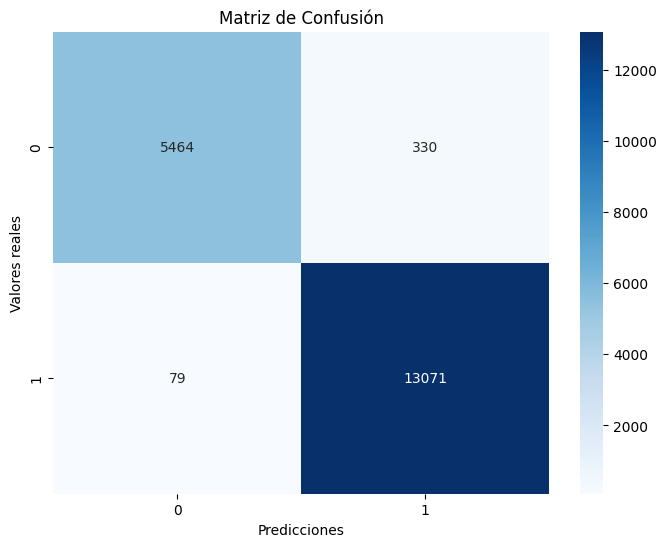

In [ ]:
matriz_confusion = confusion_matrix(y_test, y_pred_knn)
# Crear el heatmap de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Accuracy Score:", accuracy_score(y_test, y_pred_knn))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.96      5794
           1       0.98      0.99      0.98     13150

    accuracy                           0.98     18944
   macro avg       0.98      0.97      0.97     18944
weighted avg       0.98      0.98      0.98     18944

Accuracy Score: 0.9784100506756757


**Matriz de confusión**:  muestra el número de predicciones correctas e incorrectas hechas por el modelo en comparación con los valores reales.
* Verdaderos negativos = 5464 predicciones correctas de violencia fisica
* Falsos positivos = 330 predicciones incorrectas de no violencia fisica cuando en realidad era violencia fisica
* Falsos negativos = 79 predicciones incorrectas de violencia fisica cuando en realidad era no violencia fisica
* Verdaderos positivos = 13071 predicciones correctas de violencia fisica<br>
La cantidad de datos a predecir es del tamaño de 18944 muestras. El modelo predijo bien 13071 casos como violencia fisica y 5464 como no violencia fisica. Eso significa que predijo bien 18535 de 18944 totales. Consiguiendo un rendimiento (accuracy) del 97%

**Precisión:** es la proporción de verdaderos positivos entre todos los casos que el modelo ha clasificado como positivos. Mide qué tan exacto es el modelo cuando dice que una instancia pertenece a la clase positiva.
* Clase 0 (False) = 0.99
* Clase 1 (True) = 0.98

**Recall**: proporción de verdaderos positivos sobre el total de verdaderos positivos y falsos negativos. Mide qué tan bien el modelo encuentra todas las instancias positivas
* Clase 0 (False) = 0.94
* Clase 1 (True) = 0.99

**F1-score**: media armónica de la precisión y el recall.
* Clase 0 (False) = 0.96
* Clase 1 (True) = 0.98

**Soporte**: número de ocurrencias de cada clase en los datos de prueba.
* Clase 0 (False) = 5749
* Clase 1 (True) = 13150

Se observa un modelo balanceado entre clases

## **Random Forest**

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf.predict(X_test)

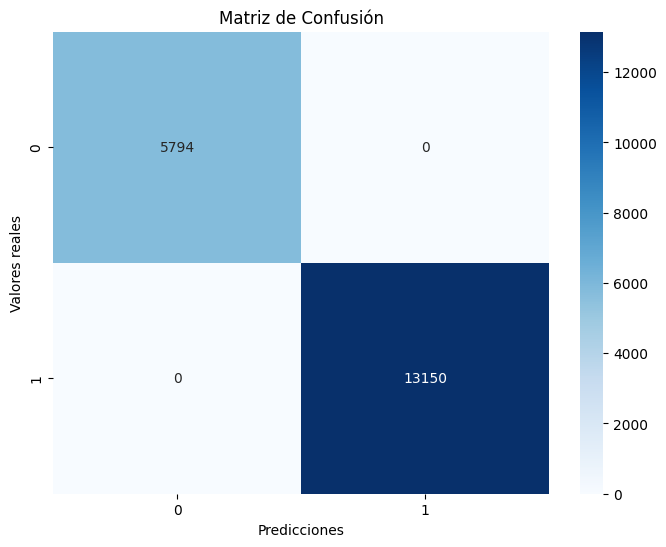

In [ ]:
matriz_confusion = confusion_matrix(y_test, y_pred_rf)
# Crear el heatmap de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5794
           1       1.00      1.00      1.00     13150

    accuracy                           1.00     18944
   macro avg       1.00      1.00      1.00     18944
weighted avg       1.00      1.00      1.00     18944

Accuracy Score: 1.0


Al igual que en KNN se observa un balanceo entre clases. Con un F1 - score que coincide entre ambas clases, se podría decir que el modelo puede identificar tanto casos de violencia física como casos en los que no.


Se observa un alto nivel de predicción de los modelos, lo cual puede dar indicios de un desbalanceo en el dataset original o algún sesgo en la seleccion de datos y variables. Por lo cual, el siguiente paso será re